In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Data Preparation

In [2]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-11-14 20:33:23--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-11-14 20:33:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-11-14 20:33:24 (17.9 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]

FINISHED --2025-11-14 20:33:24--
Total wall clock time: 0.3s
Downloaded: 1 files, 854K in 0.05s (17.9 MB/s)


In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9222.0,8996.0,9704.0,8774.0,9704.0,9202.0,9704.0
mean,200.0,4.0,150.0,3001.0,15.0,2011.0,-0.0,15.0
std,49.0,2.0,30.0,498.0,3.0,7.0,1.0,3.0
min,10.0,0.0,37.0,953.0,6.0,2000.0,-4.0,6.0
25%,170.0,3.0,130.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,149.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,170.0,3335.0,17.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [7]:
df.isna().sum()

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


In [8]:
numerical = df.select_dtypes(include='number').columns
categorical = df.select_dtypes(include='object').columns
df[numerical] = df[numerical].fillna('0')
df.isna().sum()

,0
engine_displacement,0
num_cylinders,0
horsepower,0
vehicle_weight,0
acceleration,0
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,0


In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values

In [12]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [13]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,180,3.0,158.0,3561.565665,15.8,2004,USA,Gasoline,All-wheel drive,-1.0
1,260,2.0,0,2951.641720,11.2,2023,Europe,Gasoline,Front-wheel drive,0.0
2,170,8.0,163.0,3256.561856,18.8,2012,Europe,Gasoline,Front-wheel drive,1.0
3,200,4.0,190.0,2492.677479,15.0,2006,Asia,Gasoline,All-wheel drive,0.0
4,190,3.0,193.0,2739.703825,0,2007,USA,Diesel,All-wheel drive,-2.0
...,...,...,...,...,...,...,...,...,...,...
5817,210,6.0,158.0,2892.313210,0,2021,USA,Gasoline,All-wheel drive,0.0
5818,210,6.0,165.0,3334.069984,14.5,2012,USA,Gasoline,All-wheel drive,0.0
5819,240,2.0,123.0,2238.466706,16.2,2011,Europe,Diesel,All-wheel drive,-2.0
5820,110,4.0,143.0,2771.630571,11.4,2021,Europe,Diesel,All-wheel drive,1.0


# Question 1 : Training Decision Trees model

- Use DecisionTreeClassifier only for classification (discrete classes).

- Use DecisionTreeRegressor for regression (continuous targets).

In [14]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [17]:
y_pred = dt.predict(X_val)

In [18]:
mse = mean_squared_error(y_val, y_pred)
mse #the larger max_depth number, the less mse is

2.4702047818692856

In [19]:
feature_index = dt.tree_.feature[0]  # index of the first split feature
feature_names = dv.get_feature_names_out()
feature_name = feature_names[feature_index]
print("Feature used for splitting:", feature_name)

Feature used for splitting: vehicle_weight


# Question 2 : Train a Random Forest Regressor model

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [22]:
y_pred = rf.predict(X_val)
rmse_rf = root_mean_squared_error(y_val, y_pred)
rmse_rf

0.4537211261514733

# Question 3 : Training with different n_estimators

In [23]:
estimators = range(10, 200, 10)
rmse = {}
for estimator in estimators:
    rf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    rmse[estimator] = root_mean_squared_error(y_val, y_pred)
    print(f'estimator: {estimator} RMSE: {rmse[estimator]}')#make sure to put estimator inside rmse variable



estimator: 10 RMSE: 0.4537211261514733
estimator: 20 RMSE: 0.4438678852660016
estimator: 30 RMSE: 0.44034533246396307
estimator: 40 RMSE: 0.43962005397767945
estimator: 50 RMSE: 0.43848043283759564
estimator: 60 RMSE: 0.43623453927648487
estimator: 70 RMSE: 0.435572628650758
estimator: 80 RMSE: 0.4349426372155614
estimator: 90 RMSE: 0.43450282729207623
estimator: 100 RMSE: 0.43390050640538114
estimator: 110 RMSE: 0.43346830124504976
estimator: 120 RMSE: 0.4330856519107347
estimator: 130 RMSE: 0.4330047153926287
estimator: 140 RMSE: 0.432454291281518
estimator: 150 RMSE: 0.43232866826781563
estimator: 160 RMSE: 0.4321579196479505
estimator: 170 RMSE: 0.43218282748196624
estimator: 180 RMSE: 0.43233375437727783
estimator: 190 RMSE: 0.4322400785114921


# Question 4 : Finding the best max_depth parameter

In [25]:
max_depth_values = [10, 15, 20, 25]
estimators_values = range(10, 210, 10)

results = {}

for max_depth in max_depth_values:
    rmse_list = []
    for estimator in estimators_values:
        rf = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_list.append(rmse)
    mean_rmse = np.mean(rmse_list)
    results[max_depth] = mean_rmse

best_max_depth = min(results, key=results.get)
print("Mean RMSE per max_depth:", results)
print("Best max_depth:", best_max_depth)


Mean RMSE per max_depth: {10: np.float64(0.43279383562996177), 15: np.float64(0.4353641121577742), 20: np.float64(0.4367298908632421), 25: np.float64(0.43588755942754964)}
Best max_depth: 10


# Decision Trees Parameter tuning
 ° **min_samples_leaf**:
- This specifies the minimum number of samples required to be at a leaf node (the terminal node that makes the prediction).
- Setting this to a higher value prevents the model from creating leaf nodes with very few samples, which can reduce overfitting.

- A smaller value (like 1) allows trees to create very specific leaf nodes, which can capture noise in the data and overfit.

 ° **max_depth**

- This controls the maximum depth (or height) of each decision tree in the random forest.

- It limits how many splits (levels) the tree can have from the root node down to the leaf nodes.

- A small max_depth restricts the tree from growing too complex, which can prevent overfitting but may cause underfitting.

- A large or no max_depth allows trees to grow very deep, potentially overfitting the training data.

# Question 5 : Feature Importance

In [26]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

In [27]:
feature_names = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']
feature_importance_dict = dict(zip(feature_names, importances))

In [28]:
#find the most important feature
most_important_feature = max(feature_importance_dict, key=feature_importance_dict.get)
print("Most important feature:", most_important_feature)

Most important feature: vehicle_weight


# Gradient Boosting and XGBoost
We sequentially train multiple decision tree models and each model correct the errors of the previous one

In [29]:
import xgboost as xgb

In [30]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [32]:
#creating a watchlist to monitor the performance of XGBoost model
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [107]:
%%capture output
#to capture output so we can see it later when we print it

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, #print evaluation at every 5 steps
                  evals=watchlist)

In [108]:
s = output.stdout
print(s)

[0]	train-rmse:1.84556	val-rmse:1.79575
[5]	train-rmse:0.51683	val-rmse:0.52859
[10]	train-rmse:0.36962	val-rmse:0.42359
[15]	train-rmse:0.34626	val-rmse:0.42062
[20]	train-rmse:0.33366	val-rmse:0.42051
[25]	train-rmse:0.32383	val-rmse:0.42250
[30]	train-rmse:0.31386	val-rmse:0.42355
[35]	train-rmse:0.30544	val-rmse:0.42407
[40]	train-rmse:0.29895	val-rmse:0.42478
[45]	train-rmse:0.28889	val-rmse:0.42610
[50]	train-rmse:0.28225	val-rmse:0.42787
[55]	train-rmse:0.27218	val-rmse:0.43014
[60]	train-rmse:0.26564	val-rmse:0.43090
[65]	train-rmse:0.25673	val-rmse:0.43275
[70]	train-rmse:0.25028	val-rmse:0.43411
[75]	train-rmse:0.24367	val-rmse:0.43483
[80]	train-rmse:0.23739	val-rmse:0.43612
[85]	train-rmse:0.23022	val-rmse:0.43714
[90]	train-rmse:0.22409	val-rmse:0.43711
[95]	train-rmse:0.21877	val-rmse:0.43809
[99]	train-rmse:0.21205	val-rmse:0.43899



In [109]:
y_pred = model.predict(dval)

In [110]:
root_mean_squared_error(y_val, y_pred)

0.4389850458437251

A function that returns resuls of rmse of every iteration along with as a dataframe

In [111]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [72]:
df_score = parse_xgb_output(output)
df_score.head(10)

,num_iter,train_rmse,val_rmse
0,0,1.84556,1.79575
1,5,0.51683,0.52859
2,10,0.36962,0.42359
3,15,0.34626,0.42062
4,20,0.33366,0.42051
5,25,0.32383,0.42250
6,30,0.31386,0.42355
7,35,0.30544,0.42407
8,40,0.29895,0.42478
9,45,0.28889,0.42610


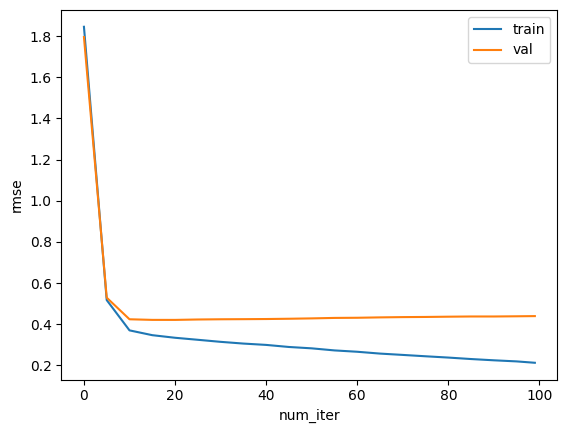

In [64]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.legend()

# Question 6 : XGBoost parameter tuning: 'eta'
Tuning the following parameters:

* `eta`
* `max_depth`
* `min_child_weight`

In [130]:
%%capture output
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [117]:
scores = {} #dont run this again to save new parameter's value

In [124]:
key = 'eta=%s' %(xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [125]:
scores.keys()

dict_keys(['eta=0.1', 'eta=0.3'])

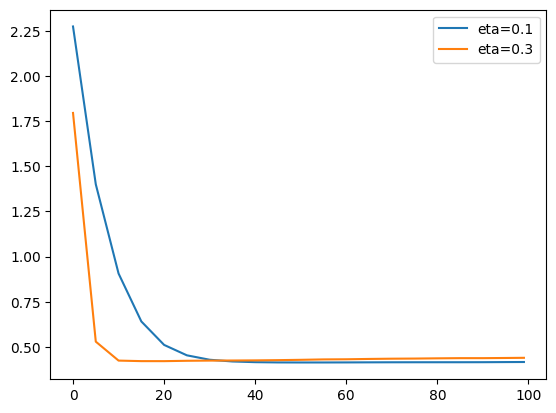

In [128]:
for eta , df_score in scores.items():
  plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()

Tuning min_child_weight parameter

In [151]:
scores = {}

In [160]:
%%capture output
xgb_params = {
    'eta': 0.1, #we chose 0.1 as best eta value
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [161]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [162]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

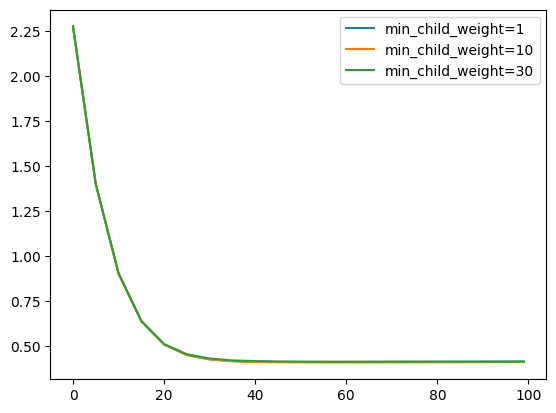

In [164]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

plt.legend() #all min_child_weight parameter give the same val_rmse score

Tuning max_depth parameter

In [168]:
scores = {}

In [175]:
%%capture output
xgb_params = {
    'eta': 0.1, #we chose 0.1 as best eta value
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [176]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [177]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=4', 'max_depth=3'])

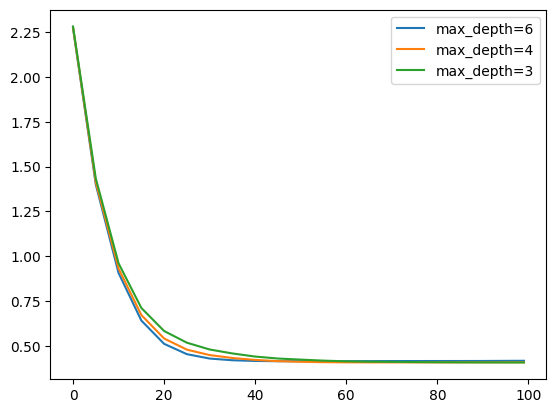

In [180]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

plt.legend() #rmse score for three different max_depth parameter's  value are almost similar